In [ ]:
# Random Forest

In [1]:
#1. Exploratory Data Analysis (EDA):
# Perform exploratory data analysis to understand the structure of the dataset.
# Check for missing values, outliers, inconsistencies in the data.

In [7]:
import pandas as pd
df=pd.read_excel("glass.xlsx",sheet_name=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
# Perform exploratory data analysis to understand the structure of the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df.isnull().sum() # There are no null values in the given data set.

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1)

In [12]:
df.drop_duplicates(inplace=True) # There is one duplicate and it is removed.

In [13]:
df.shape

(213, 10)

In [14]:
# Check for missing values, outliers, inconsistencies in the data.

<Axes: >

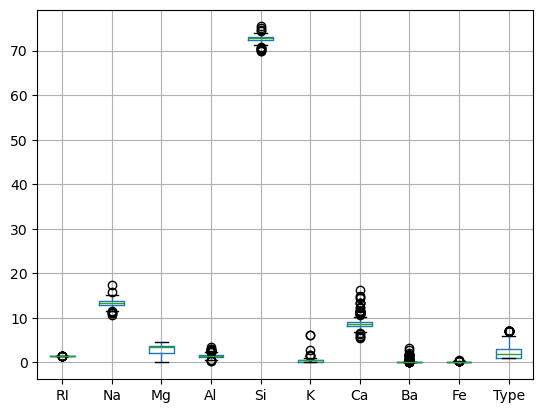

In [15]:
# There are no missing values in the given data set.
df.boxplot() # There are outliers in all variables except in Mg column.

In [16]:
df['Type'].value_counts() # There is no inconsistencies in the given data set.

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [17]:
# 2: Data Visualization:
# Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
# Analyze any patterns or correlations observed in the data.

In [18]:
# 2: Data Visualization:
# Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

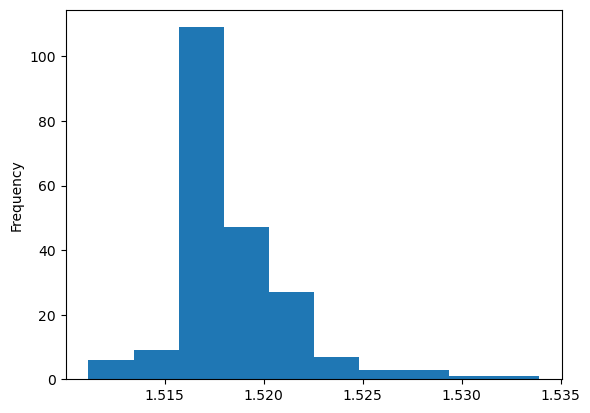

In [19]:
import matplotlib.pyplot as plt
df['RI'].plot(kind='hist') # RI is having positive skewness.
plt.show()

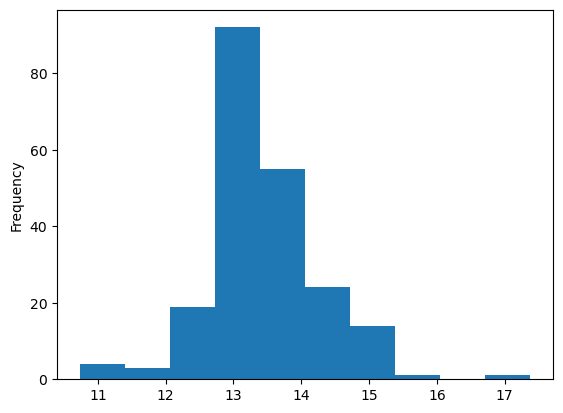

In [20]:
df['Na'].plot(kind='hist') # Na is having symmetric skewness.
plt.show()

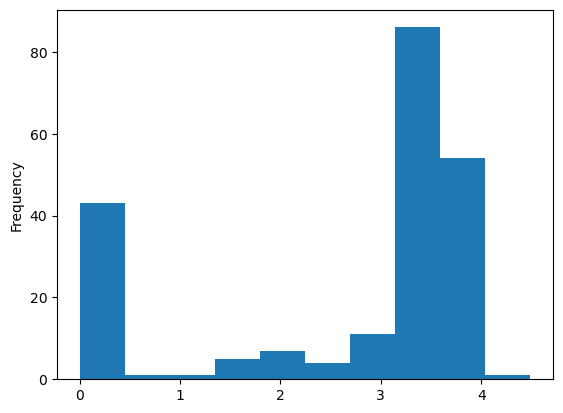

In [21]:
df['Mg'].plot(kind='hist') # Mg is having negative skewness.
plt.show()

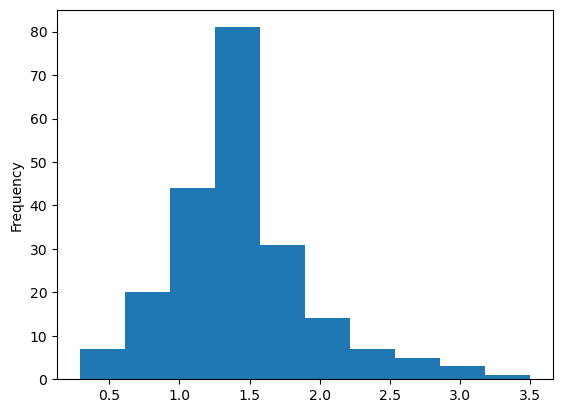

In [22]:
df['Al'].plot(kind='hist') # Al is having slightlypositive skewness.
plt.show()

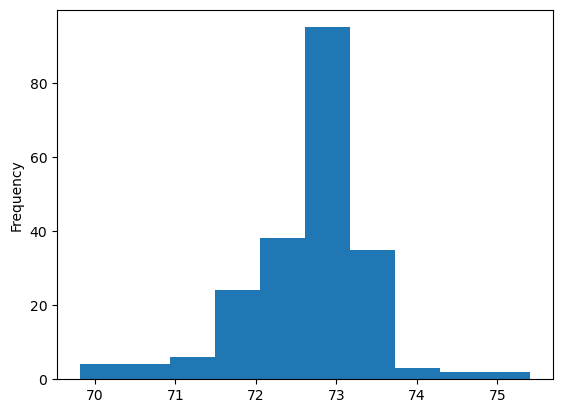

In [23]:
df['Si'].plot(kind='hist') # Si is having symmetric skewness.
plt.show()

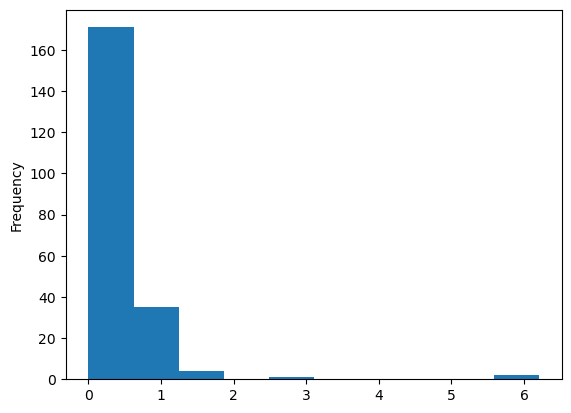

In [24]:
df['K'].plot(kind='hist') # K is having positive skewness.
plt.show()

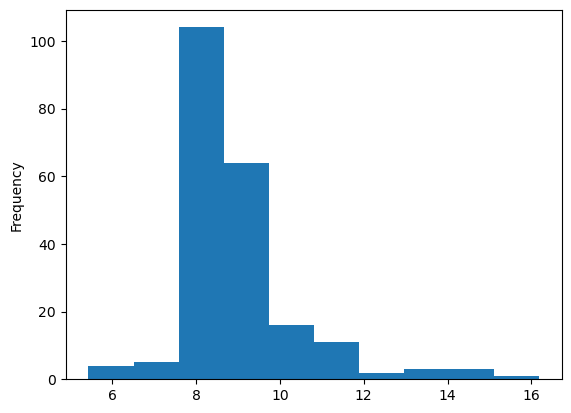

In [25]:
df['Ca'].plot(kind='hist') # Ca is having slightly positive skewness.
plt.show()

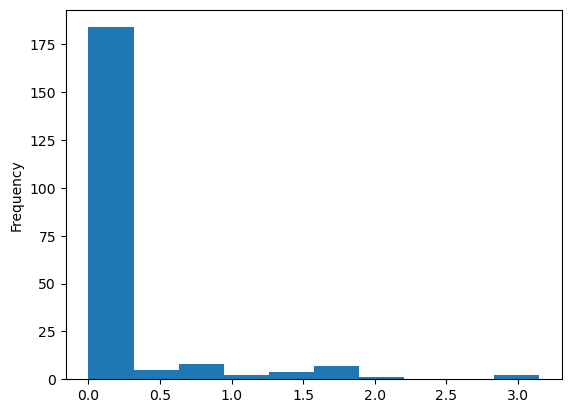

In [26]:
df['Ba'].plot(kind='hist') # Ba is having positive skewness.
plt.show()

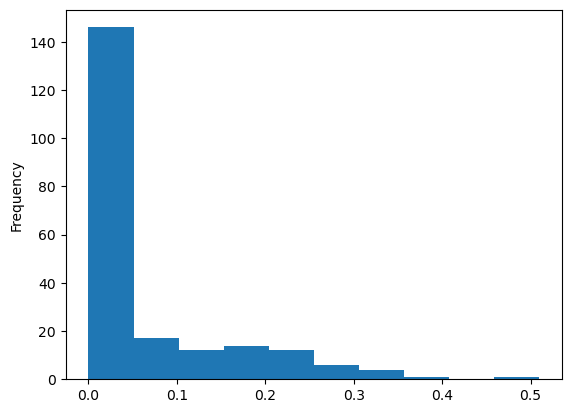

In [27]:
df['Fe'].plot(kind='hist') # Fe is having positive skewness.
plt.show()

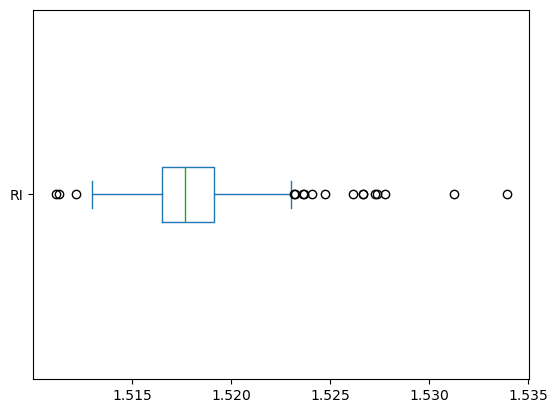

In [28]:
df['RI'].plot(kind='box',vert=False)
plt.show()

In [29]:
import numpy as np
import pandas as pd
q1=np.percentile(df['RI'],25)
q2=np.percentile(df['RI'],50)
q3=np.percentile(df['RI'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['RI']>uw])
len(df[df['RI']<lw])
print(f"length of ouliers above uw is {len(df[df['RI']>uw])}")
print(f"length of ouliers below lw is {len(df[df['RI']<lw])}")
df.loc[df['RI']>uw,'RI']= uw
df.loc[df['RI']<lw,'RI']= lw

upper whisker length is 1.52
lower whisker length is 1.51
length of ouliers above uw is 14
length of ouliers below lw is 3


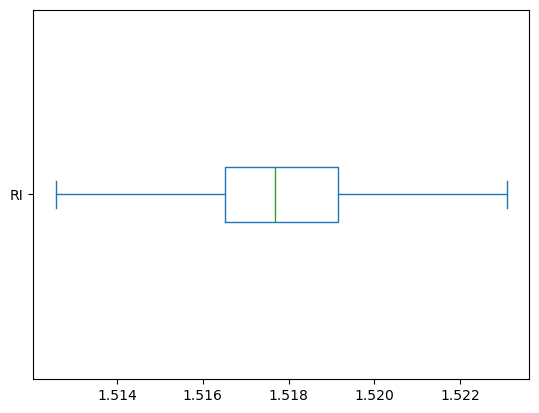

In [30]:
df['RI'].plot(kind='box',vert=False)
plt.show()

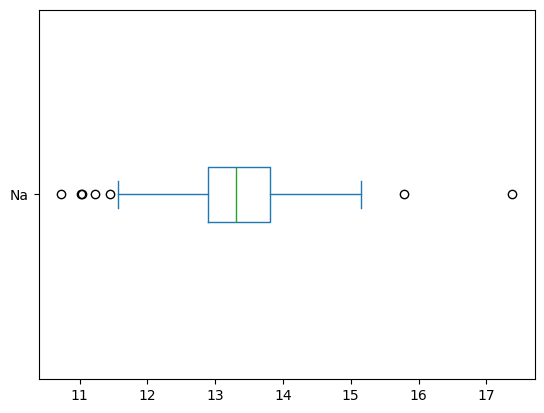

In [31]:
df['Na'].plot(kind='box',vert=False)
plt.show()

In [32]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Na'],25)
q2=np.percentile(df['Na'],50)
q3=np.percentile(df['Na'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Na']>uw])
len(df[df['Na']<lw])
print(f"length of ouliers above uw is {len(df[df['Na']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Na']<lw])}")
df.loc[df['Na']>uw,'Na']= uw
df.loc[df['Na']<lw,'Na']= lw

upper whisker length is 15.18
lower whisker length is 11.54
length of ouliers above uw is 2
length of ouliers below lw is 5


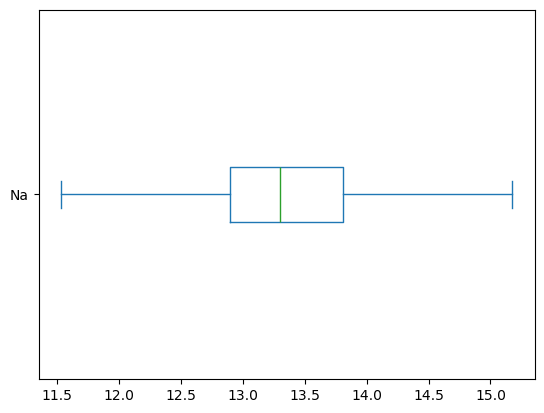

In [33]:
df['Na'].plot(kind='box',vert=False)
plt.show()

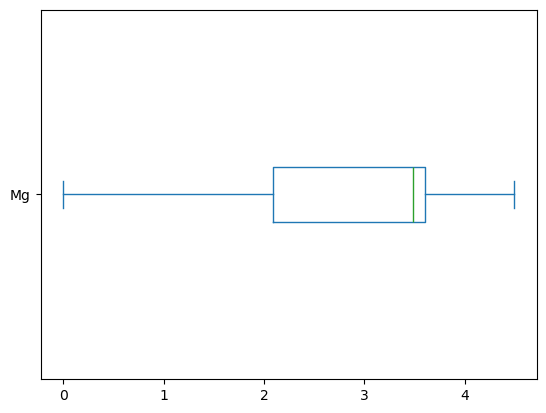

In [34]:
df['Mg'].plot(kind='box',vert=False) # There are no outliers for Mg.
plt.show()

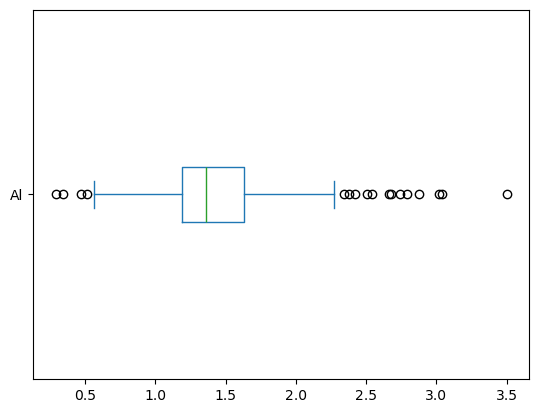

In [35]:
df['Al'].plot(kind='box',vert=False)
plt.show()

In [36]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Al'],25)
q2=np.percentile(df['Al'],50)
q3=np.percentile(df['Al'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Al']>uw])
len(df[df['Al']<lw])
print(f"length of ouliers above uw is {len(df[df['Al']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Al']<lw])}")
df.loc[df['Al']>uw,'Al']= uw
df.loc[df['Al']<lw,'Al']= lw

upper whisker length is 2.29
lower whisker length is 0.53
length of ouliers above uw is 13
length of ouliers below lw is 4


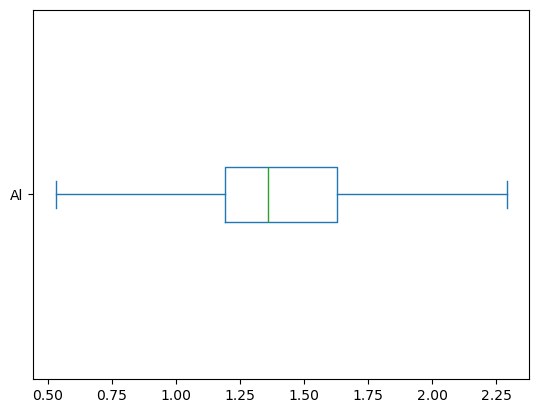

In [37]:
df['Al'].plot(kind='box',vert=False)
plt.show()

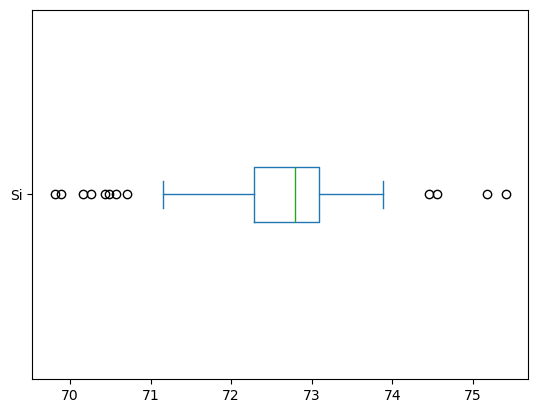

In [38]:
df['Si'].plot(kind='box',vert=False)
plt.show()

In [39]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Si'],25)
q2=np.percentile(df['Si'],50)
q3=np.percentile(df['Si'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Si']>uw])
len(df[df['Si']<lw])
print(f"length of ouliers above uw is {len(df[df['Si']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Si']<lw])}")
df.loc[df['Si']>uw,'Si']= uw
df.loc[df['Si']<lw,'Si']= lw

upper whisker length is 74.31
lower whisker length is 71.06
length of ouliers above uw is 4
length of ouliers below lw is 8


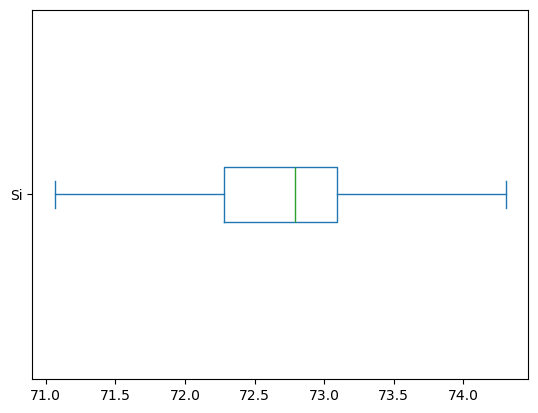

In [40]:
df['Si'].plot(kind='box',vert=False)
plt.show()

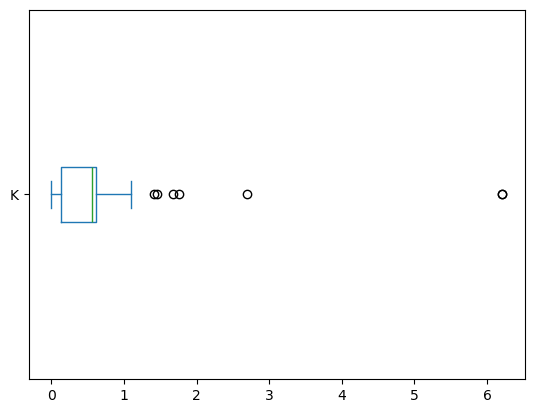

In [41]:
df['K'].plot(kind='box',vert=False)
plt.show()

In [42]:
import numpy as np
import pandas as pd
q1=np.percentile(df['K'],25)
q2=np.percentile(df['K'],50)
q3=np.percentile(df['K'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
len(df[df['K']>uw])
len(df[df['K']<lw])
print(f"length of ouliers above uw is {len(df[df['K']>uw])}")
df.loc[df['K']>uw,'K']= uw

upper whisker length is 1.33
length of ouliers above uw is 7


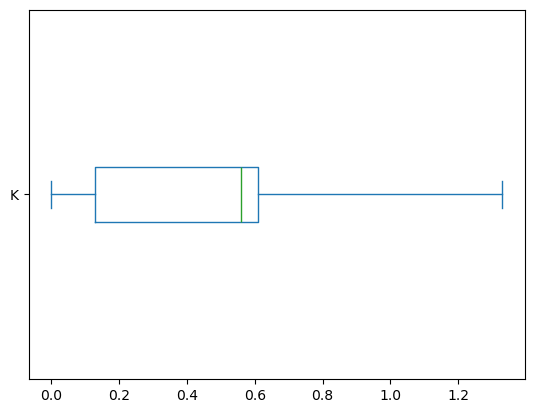

In [43]:
df['K'].plot(kind='box',vert=False)
plt.show()

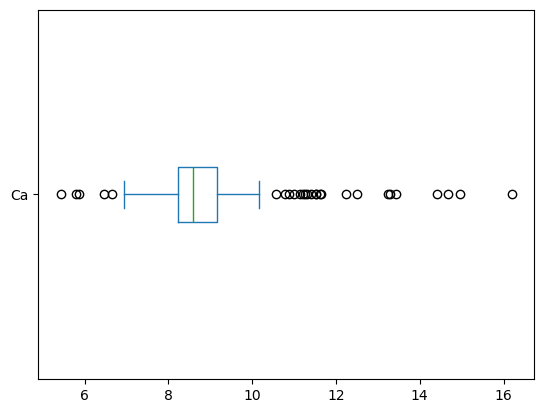

In [44]:
df['Ca'].plot(kind='box',vert=False)
plt.show()

In [45]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Ca'],25)
q2=np.percentile(df['Ca'],50)
q3=np.percentile(df['Ca'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Ca']>uw])
len(df[df['Ca']<lw])
print(f"length of ouliers above uw is {len(df[df['Ca']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Ca']<lw])}")
df.loc[df['Ca']>uw,'Ca']= uw
df.loc[df['Ca']<lw,'Ca']= lw

upper whisker length is 10.52
lower whisker length is 6.88
length of ouliers above uw is 22
length of ouliers below lw is 5


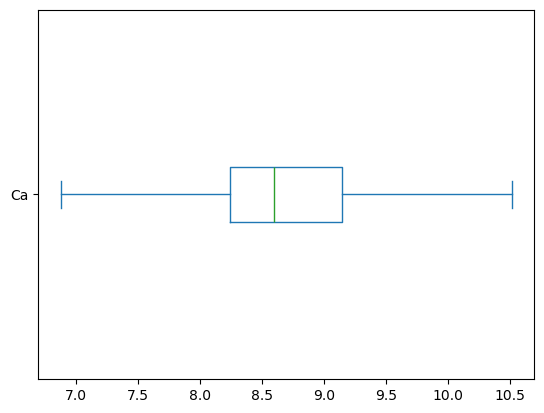

In [46]:
df['Ca'].plot(kind='box',vert=False)
plt.show()

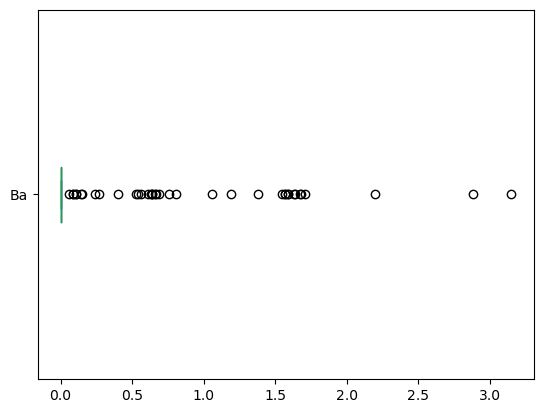

In [47]:
df['Ba'].plot(kind='box',vert=False)
plt.show()

In [48]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Ba'],25)
q2=np.percentile(df['Ba'],50)
q3=np.percentile(df['Ba'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Ba']>uw])
len(df[df['Ba']<lw])
print(f"length of ouliers above uw is {len(df[df['Ba']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Ba']<lw])}")
df.loc[df['Ba']>uw,'Ba']= uw
df.loc[df['Ba']<lw,'Ba']= lw

upper whisker length is 0.0
lower whisker length is 0.0
length of ouliers above uw is 38
length of ouliers below lw is 0


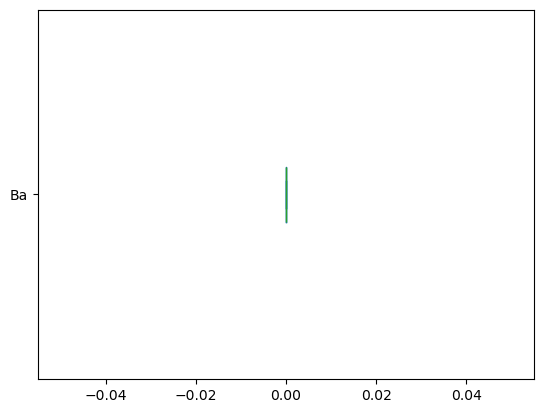

In [49]:
df['Ba'].plot(kind='box',vert=False)
plt.show()

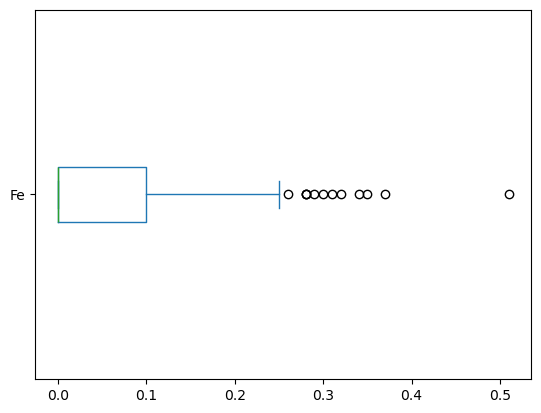

In [50]:
df['Fe'].plot(kind='box',vert=False)
plt.show()

In [51]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Fe'],25)
q2=np.percentile(df['Fe'],50)
q3=np.percentile(df['Fe'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Fe']>uw])
len(df[df['Fe']<lw])
print(f"length of ouliers above uw is {len(df[df['Fe']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Fe']<lw])}")
df.loc[df['Fe']>uw,'Fe']= uw
df.loc[df['Fe']<lw,'Fe']= lw

upper whisker length is 0.25
lower whisker length is -0.15
length of ouliers above uw is 12
length of ouliers below lw is 0


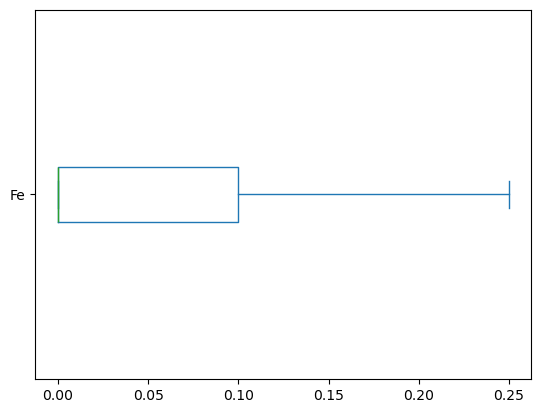

In [52]:
df['Fe'].plot(kind='box',vert=False)
plt.show()

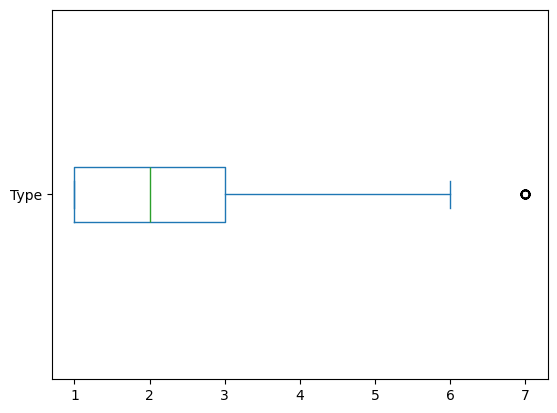

In [53]:
df['Type'].plot(kind='box',vert=False)
plt.show()

In [54]:
import numpy as np
import pandas as pd
q1=np.percentile(df['Type'],25)
q2=np.percentile(df['Type'],50)
q3=np.percentile(df['Type'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Type']>uw])
len(df[df['Type']<lw])
print(f"length of ouliers above uw is {len(df[df['Type']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Type']<lw])}")
df.loc[df['Type']>uw,'Type']= uw
df.loc[df['Type']<lw,'Type']= lw

upper whisker length is 6.0
lower whisker length is -2.0
length of ouliers above uw is 29
length of ouliers below lw is 0


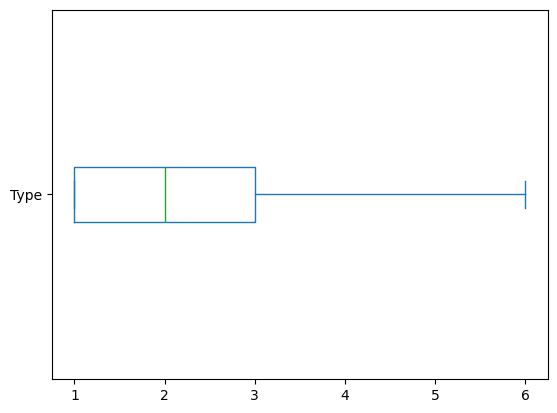

In [55]:
df['Type'].plot(kind='box',vert=False)
plt.show()

In [56]:
# Now all the outliers are removed from all the columns.

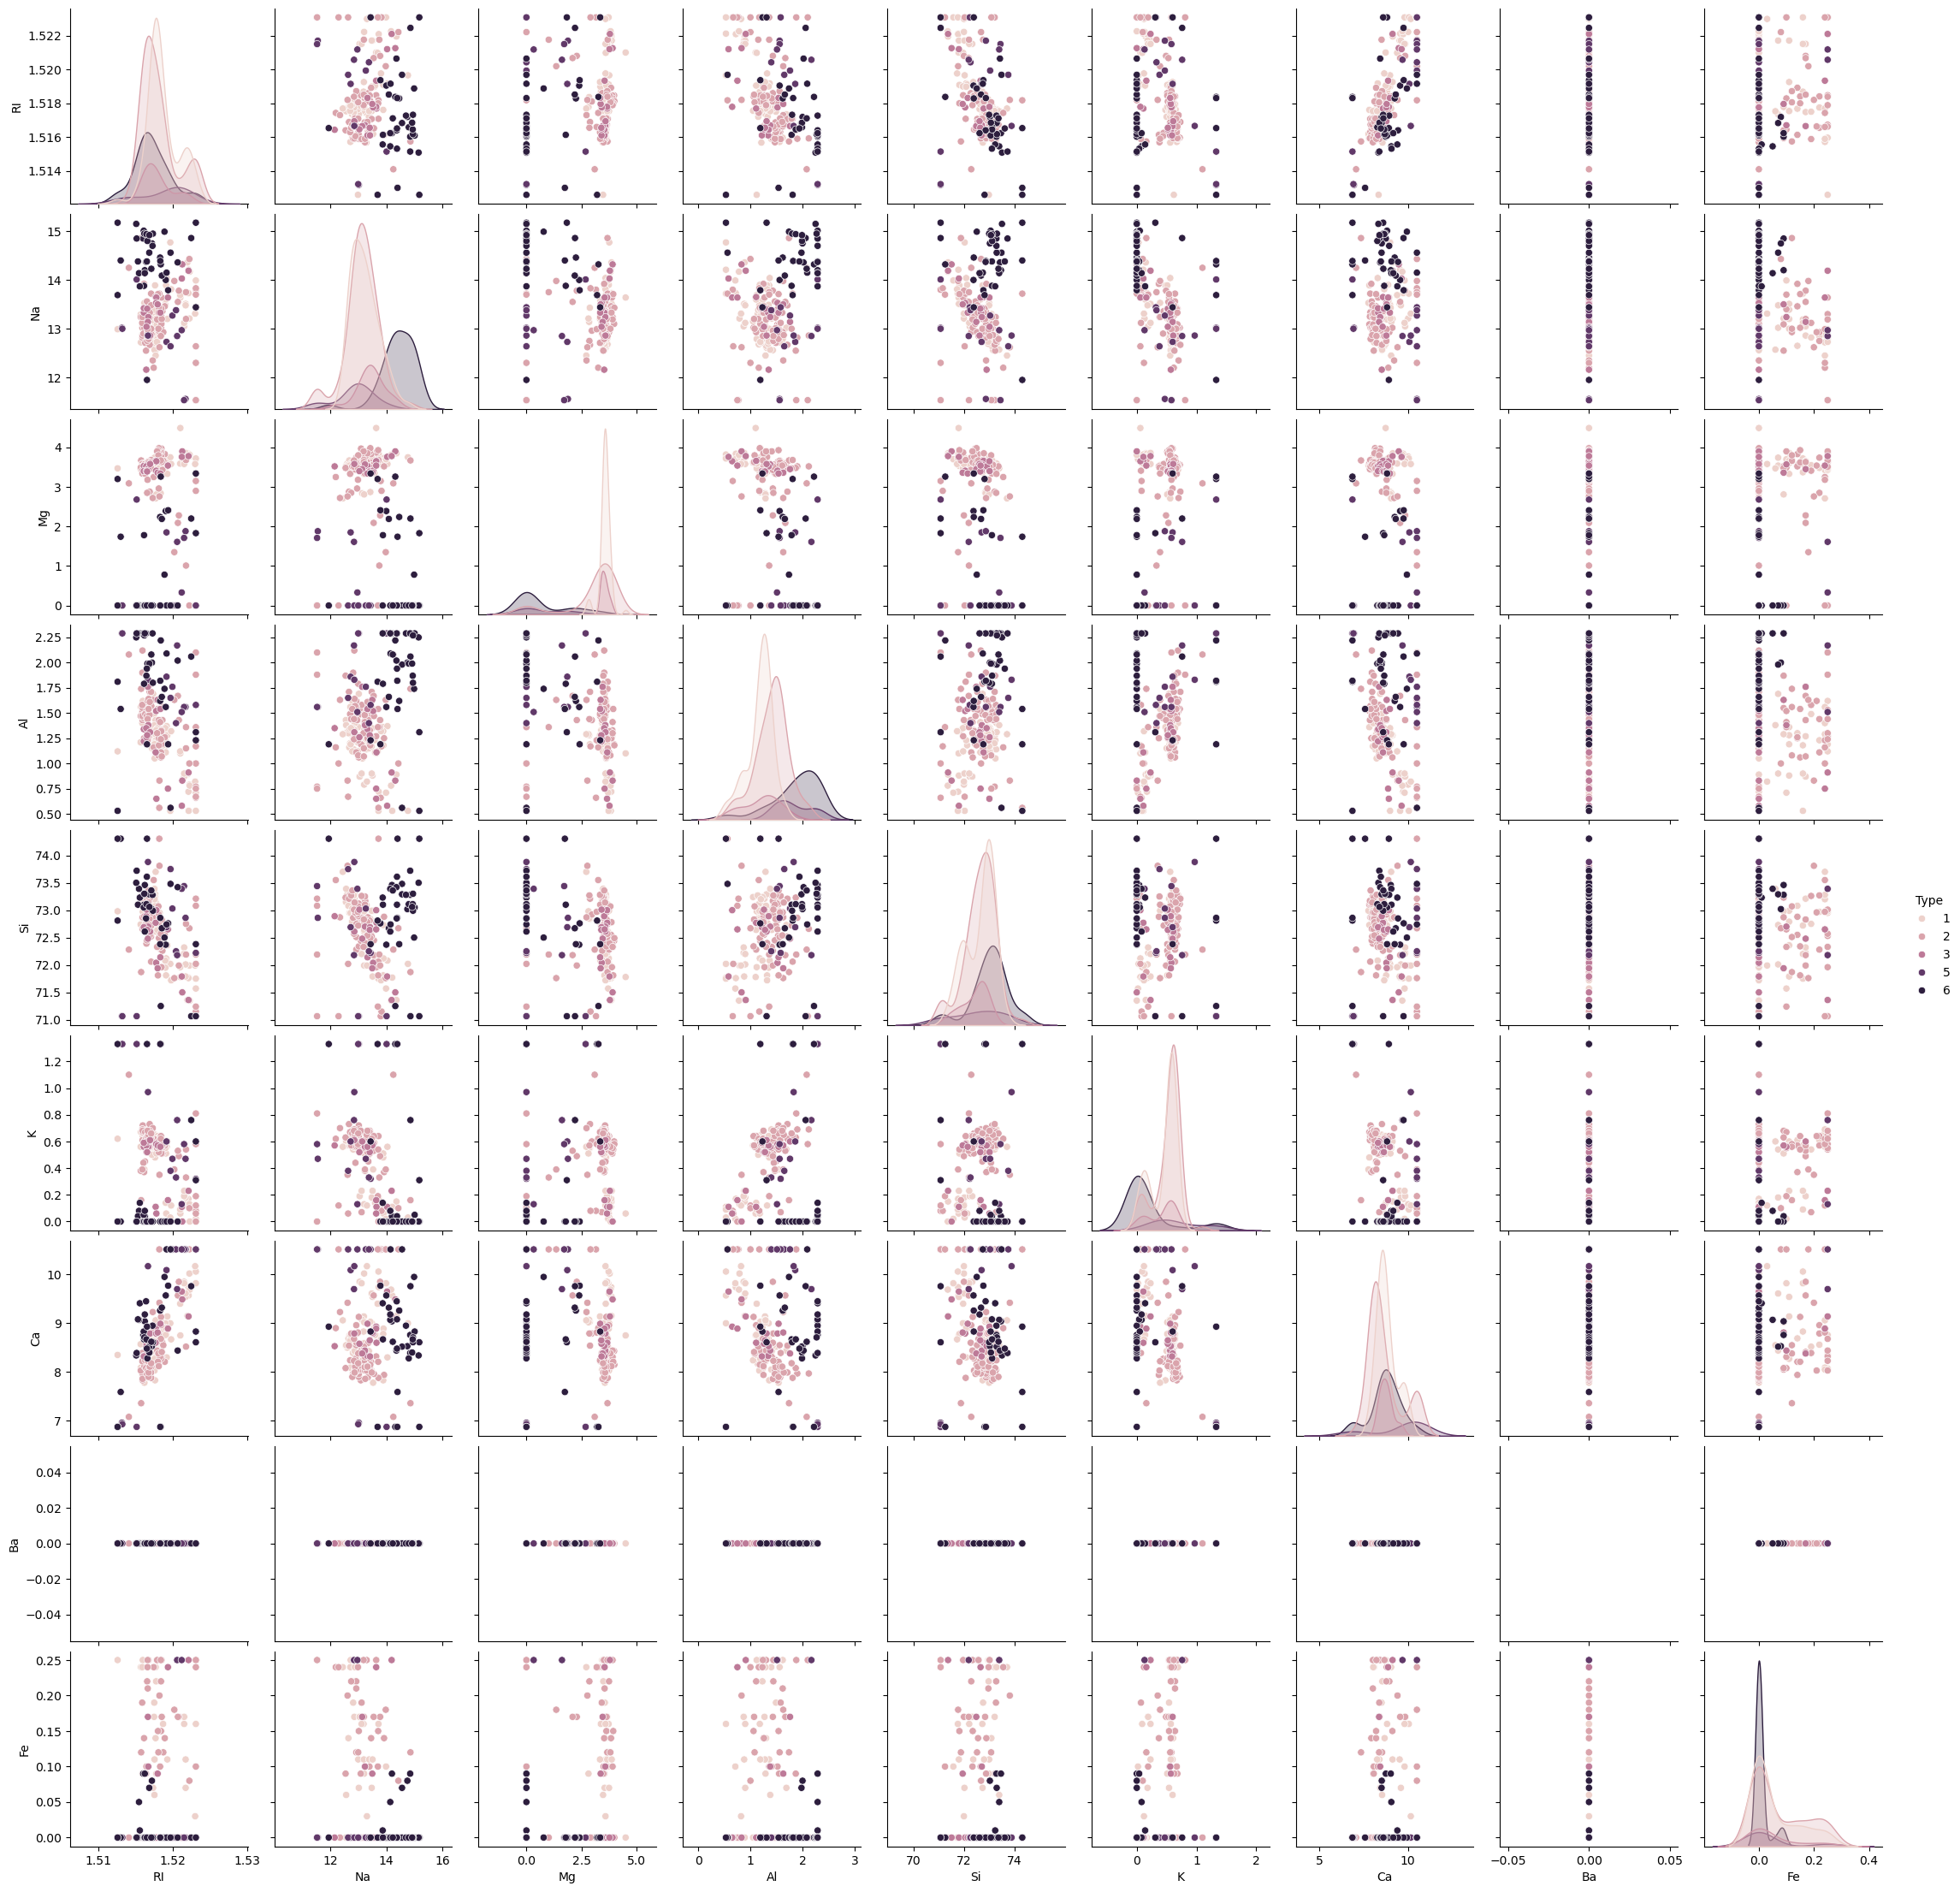

In [57]:
# pairplots
import seaborn as sns
sns.pairplot(df,hue='Type')
plt.show()

In [58]:
# Analyze any patterns or correlations observed in the data.

In [59]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.072901,-0.038895,-0.461848,-0.526911,-0.339382,0.760626,NaN,0.100217,-0.155095
Na,-0.072901,1.000000,-0.300589,0.223172,-0.158794,-0.492717,-0.103610,NaN,-0.249138,0.503702
Mg,-0.038895,-0.300589,1.000000,-0.472330,-0.206544,0.334363,-0.372089,NaN,0.104381,-0.739870
Al,-0.461848,0.223172,-0.472330,1.000000,0.130631,0.173969,-0.277706,NaN,-0.096567,0.585616
Si,-0.526911,-0.158794,-0.206544,0.130631,1.000000,-0.040748,-0.188686,NaN,-0.068593,0.166276
K,-0.339382,-0.492717,0.334363,0.173969,-0.040748,1.000000,-0.497856,NaN,0.076522,-0.243427
Ca,0.760626,-0.103610,-0.372089,-0.277706,-0.188686,-0.497856,1.000000,NaN,0.106853,0.073455
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.100217,-0.249138,0.104381,-0.096567,-0.068593,0.076522,0.106853,NaN,1.000000,-0.219217
Type,-0.155095,0.503702,-0.739870,0.585616,0.166276,-0.243427,0.073455,NaN,-0.219217,1.000000


In [60]:
# RI is having good positive relationship with Ca,Fe.
# Na is having positive relationship with AI,Type.
# Mg is having positive relationship with K,Fe.
# AI is having positive relationship with Na,Si,K,Type.
# Si is having positive relationship with AI,Type.
# K is having positive relationship with Mg,AI,Fe.
# Ca is having positive relationship with RI,Fe,Type.
# Fe is having positive relationip with RI,Mg,K,Ca.
# Type is having positive relationship with Na,AI,Si,Ca.

In [61]:
#3: Data Preprocessing
#1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy 
#(e.g., imputation or removal) and explain your reasoning.
# 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
#3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. 
#Handling the imbalance data

In [62]:
#3: Data Preprocessing
#1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy 
#(e.g., imputation or removal) and explain your reasoning.
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [63]:
# There are no null values in the dataset.If there are nullvalues they can be replaced with their mean or median values.
# Because if you are having null values it will effect our model if we replace it with mean or median values if not effect our model.

In [64]:
# 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
# Here in this data set we have only one categorical variable i.e,Type our target variable, it is already encoded in form of label encoding.
# There are no binary categorical to do one-hot encoding.

In [65]:
#3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. 
#Handling the imbalance data
df_count= df[df.columns[[0,1,2,3,4,5,6,7,8]]]
df_count

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


In [66]:
# Apply standardization for continous variables.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_count= ss.fit_transform(df_count)
ss_count= pd.DataFrame(ss_count)
ss_count.columns=df_count.columns
ss_count

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,0.0,-0.621102
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,0.0,-0.621102
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,0.0,-0.621102
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,0.0,-0.621102
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,0.0,-0.621102
...,...,...,...,...,...,...,...,...,...
208,-0.813017,0.998432,-1.860172,2.060042,-0.096228,-1.187901,0.456303,0.0,-0.621102
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,0.0,-0.621102
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,0.0,-0.621102
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,0.0,-0.621102


In [67]:
#4: Random Forest Model Implementation
#1. Divide he data into train and test split.
#2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
#3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [68]:
#4: Random Forest Model Implementation
#1. Divide he data into train and test split.
#2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
#3. Train the model on the train dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=10,criterion='gini',max_features=0.6,max_samples=0.7,random_state=42,max_depth=6)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

In [69]:
X= ss_count
Y= df['Type']

In [70]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=42,stratify=Y)

In [71]:
pipeline=Pipeline([
    ('scale',StandardScaler()),
    ('smote',SMOTE(k_neighbors=3)),
    ('clf',DecisionTreeClassifier(class_weight='balanced'))
])  
pipeline.fit(X_train,Y_train)    
    

Pipeline(steps=[('scale', StandardScaler()), ('smote', SMOTE(k_neighbors=3)),
                ('clf', DecisionTreeClassifier(class_weight='balanced'))])

In [72]:
Y_pred_train= pipeline.predict(X_train)
Y_pred_test= pipeline.predict(X_test)

In [73]:
#3. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [74]:
from sklearn.metrics import accuracy_score
train_accuracy= accuracy_score(Y_train,Y_pred_train)
test_accuracy= accuracy_score(Y_test,Y_pred_test)
print("accuracy_score for training data is ",train_accuracy)
print("accuracy_score for testing data is ",np.round(test_accuracy,2))

accuracy_score for training data is  1.0
accuracy_score for testing data is  0.67


In [75]:
from sklearn.metrics import precision_score
train_precision= precision_score(Y_train,Y_pred_train,average='macro')
test_precision= precision_score(Y_test,Y_pred_test,average='macro')
print("precision_score for training data is ",np.round(train_precision,2))
print("precision_score for testing data is ",np.round(test_precision,2))

precision_score for training data is  1.0
precision_score for testing data is  0.72


In [76]:
from sklearn.metrics import recall_score
train_recall= recall_score(Y_train,Y_pred_train,average='macro')
test_recall= recall_score(Y_test,Y_pred_test,average='macro')
print("recall_score for training data is ",np.round(train_recall,2))
print("recall_score for testing data is ",np.round(test_recall,2))

recall_score for training data is  1.0
recall_score for testing data is  0.68


In [77]:
from sklearn.metrics import f1_score
train_f1= f1_score(Y_train,Y_pred_train,average='macro')
test_f1= f1_score(Y_test,Y_pred_test,average='macro')
print("f1_score for training data is ",np.round(train_recall,2))
print("f1_score for testing data is ",np.round(test_recall,2))

f1_score for training data is  1.0
f1_score for testing data is  0.68


In [78]:
#5: Bagging and Boosting Methods
# Apply the Bagging and Boosting methods and compare the results.

In [79]:
# Bagging method
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bc= BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,max_features=0.6,max_samples=0.7)
bc.fit(X_train,Y_train)

BaggingClassifier(estimator=LogisticRegression(), max_features=0.6,
                  max_samples=0.7, n_estimators=100)

In [80]:
Y_pred_train = bc.predict(X_train)
Y_pred_test= bc.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print(f"accuracy score for training set is {np.round(train_accuracy,2)}")
print(f"accuracy score for testing set is {np.round(test_accuracy,2)}")

accuracy score for training set is 0.66
accuracy score for testing set is 0.62


In [82]:
# Boosting methods
# Gradient Boosting Method
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_features=0.7,n_estimators=100,learning_rate=0.1)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(max_features=0.7)

In [83]:
Y_pred_train = gb.predict(X_train)
Y_pred_test = gb.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print(f"accuracy score for training set is {np.round(train_accuracy,2)}")
print(f"accuracy score for testing set is {np.round(test_accuracy,2)}")

accuracy score for training set is 1.0
accuracy score for testing set is 0.86


In [85]:
#Ada Boost Method
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=300,learning_rate=0.1)
ab.fit(X_train,Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=300)

In [86]:
Y_pred_train = ab.predict(X_train)
Y_pred_test = ab.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print(f"accuracy score for training set is {np.round(train_accuracy,2)}")
print(f"accuracy score for testing set is {np.round(test_accuracy,2)}")

accuracy score for training set is 1.0
accuracy score for testing set is 0.75


In [96]:
# Extreme Gradient Boosting Method
import sys
!{sys.executable} -m pip install xgboost

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

from imblearn.over_sampling import SMOTE
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

In [107]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [110]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
from sklearn.metrics import accuracy_score
train_accuracy= accuracy_score(Y_train,Y_pred_train)
test_accuracy= accuracy_score(Y_test,Y_pred_test)
print(" accuracy score of training set is ",train_accuracy)
print(" accuracy score of testing set is ",np.round(test_accuracy,2))

 accuracy score of training set is  1.0
 accuracy score of testing set is  0.81


In [ ]:
# For Bagging method accuracy score for training set is 0.66 and for testing set is 0.62
# for this we are get less accuracy and our model need to be improved.
# For Boosting methods
# There are different boosting methods
# Gradient boosting method accuracy score for training set is 1.0 and for testing set is 0.86
# for this we get good accuracy score and our model is good.
# Ada boost method accuracy score for training set is 1.0 and for testing set is 0.75
# This model is also good model when compared to Gradient boost it is little less.
# XGB model accuracy score of training set is  1.0 and of testing set is  0.81
# This model is better than the Ada boost model
# Totally when compared with all these models Gradient Boosting is excellent for our data set.

In [ ]:
# Additional Notes:
# 1. Explain Bagging and Boosting methods. How is it different from each other.
# 2. Explain how to handle imbalance in the data.

In [ ]:
# Additional Notes:
# 1. Explain Bagging and Boosting methods. How is it different from each other.
# Generally Bagging method is  one of the parallel method here every model is independent of each other.In bagging method we can use any base estimator.
# We can n_no of same model to main method.
# Whereas Boosting methods are sequential methods.Here every model is dependent on the other. The error of first model is taken by the second model,
# then the error of second model error is taken by the third model and so on.

In [ ]:
# 2. Explain how to handle imbalance in the data.
# Imbalance data means our target variable in having inconsistency in their classes if it is multiclass.
# Then minority class will be effect more and our model may fail.
# So to avoid this we have to handle imbalance in the data.
# Here I use SMOTE over sampling method so that minority class also get equal prirority.
# By taking more data , so that minority class samples are gathered.
# Evaluating metrics for imbalanced data.